### Generate graph 2.3, solve exercise 2.6 for stationary cases ###

In [1]:
#%%
import numpy as np
import matplotlib.pyplot as plt
#import pdb

In [7]:
#%%Initialisations
#total number of bandit arms
n = 10

#total number of experiments
t = 1000

#probability of random exploration(fraction)
epsilon = []
epsilon = [0,0.1]

#number of bandits(episodes)
bandit_number = 2000

#current value estimate of action
Q = np.zeros((bandit_number,n))
init_value = 5.0
Q_opt = np.full((bandit_number,n),5.0)
#Q_opt = np.asarray([[init_value for column in range(n)] for row in range(bandit_number)])
Q_greedy = np.zeros((bandit_number,n))

#number of times an action was chosen for each bandit
N = np.zeros((bandit_number,n))

#optimal action that should be chosen for each bandit
a_opt = np.zeros((bandit_number,n))

#initial same values to all the arms
Q_star = np.random.normal(loc=0,scale=1,size=(bandit_number,n))

#cumulative reward at each episode for chossing an action by probability epsilon
avg_reward = np.asmatrix(np.zeros((len(epsilon),t)))
avg_reward_greedy = np.asmatrix(np.zeros((len(epsilon),t)))


opt_act = np.asmatrix(np.zeros((len(epsilon),t)))
opt_act_greedy = np.asmatrix(np.zeros((len(epsilon),t)))

#function Bandit taking action and bandit as input, returning reward.
def bandit(a,ids):
    R = np.random.normal(loc=Q_star[ids,a],scale=1,size=1)
    return R

In [8]:
#%%A simple bandit algorithm:correct cleaning
for k in range(len(epsilon)):
    if (epsilon[k] == 0):
        Q = Q_opt.copy()
    else :
        Q = Q_greedy.copy()
        
    for episode in range(1, t):
        local_reward = 0.0
        local_reward_greedy = 0.0
        action_history = 0.0
        action_history_greedy = 0.0
        for machine in range(1,bandit_number):
            p = np.random.rand()
            if p <= epsilon[k]:
                a =  np.random.randint(1,high=n)
            else:
                a = np.argmax(Q[machine,:])

            #reward for choosing an action a for corresponding machine
            rewards = bandit(a,machine)

            #update the estimate
            Q[machine,a] = Q[machine,a] + 0.1*(rewards-Q[machine,a])
            
            #local rewards for choosing a lever arm 
            local_reward += rewards
            
            #calculating an optimal action
            idx = np.argmax(Q_star[machine,:])
            action_history += (a==idx)
        
        avg_reward[k,episode] = (local_reward/bandit_number)
        opt_act[k,episode]= 100*(action_history/bandit_number)

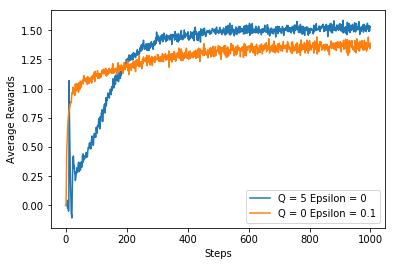

In [9]:
#%%plot graphs for average rewards
for reward in range(len(epsilon)):
    if (epsilon[reward] == 0):
        plt.plot(avg_reward[reward,:].T,label = 'Q = 5 ' + 'Epsilon = ' + str(epsilon[reward]))
    else:
        plt.plot(avg_reward[reward,:].T, label = 'Q = 0 ' + 'Epsilon = ' + str(epsilon[reward]))
    plt.xlabel('Steps')
    plt.ylabel('Average Rewards')
    plt.legend()

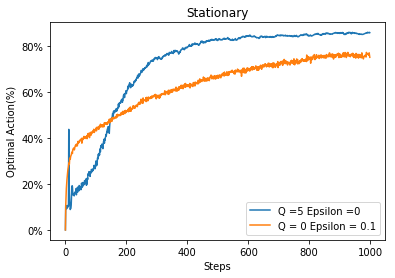

In [10]:
#%%plot graph of percentage of choosing optimal actions
for reward1 in range(len(epsilon)):
    if (epsilon[reward1] == 0):
        ax = plt.plot(opt_act[reward1,:].T,label='Q =5 '  + 'Epsilon =' + str(epsilon[reward1]))
    else:
        ax = plt.plot(opt_act[reward1,:].T,label = 'Q = 0 ' + 'Epsilon = ' +str(epsilon[reward1]))
        plt.xlabel('Steps')
    plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
    plt.ylabel('Optimal Action(%)')
    plt.legend()
    plt.title('Stationary')